### Name: Yossief chanyalew
#### Machine learning task 3
#### Implement a support vectro machine (SVM) to classify image of cat and dogs from kaggel dataset
###### Dataset link :- https://www.kaggle.com/c/dogs-vs-cats/data
#### Importing the important libraries

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

In [42]:
filenames = os.listdir("train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head(25000)

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


<Axes: xlabel='category'>

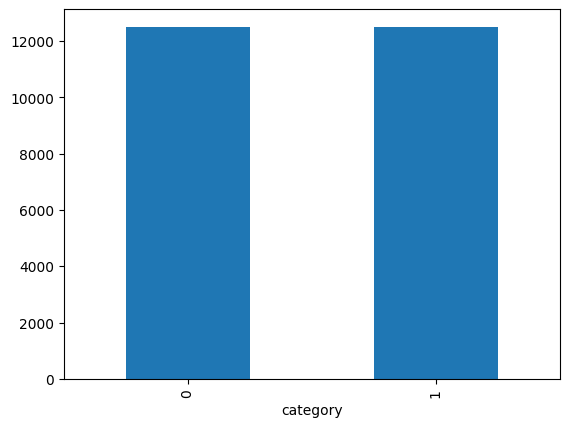

In [43]:
df['category'].value_counts().plot.bar()

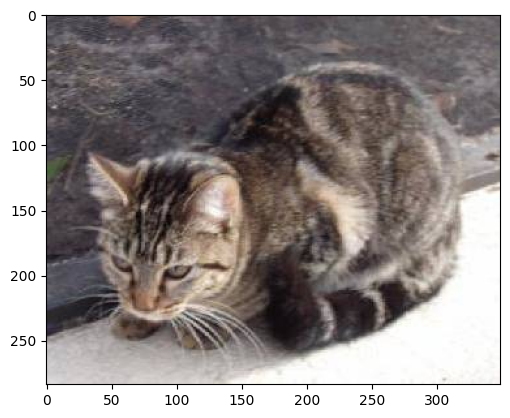

In [44]:
import numpy as np
import pandas as pd
import random
import os
from tensorflow.keras.preprocessing.image import load_img  # Import load_img from tensorflow.keras

# Assuming you have a list of image file names in 'filenames'
sample = random.choice(filenames)

# Assuming the images are in the "train/train/" directory
image_path = os.path.join("train", sample)

# Load the image
image = load_img(image_path)

# Display the image
plt.imshow(image)
plt.show()

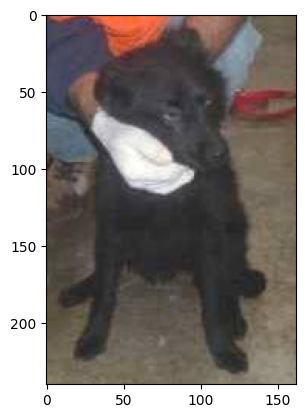

In [45]:
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

In [46]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [47]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [48]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have a DataFrame 'train_df' with 'filename' and 'category' columns
# Ensure 'category' values are represented as strings
train_df['category'] = train_df['category'].astype(str)

# Create an ImageDataGenerator with appropriate augmentation settings
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create a generator using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "train/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.


In [49]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have a DataFrame 'validate_df' with 'filename' and 'category' columns
# Ensure 'category' values are represented as strings
validate_df['category'] = validate_df['category'].astype(str)

# Create an ImageDataGenerator with appropriate rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator using flow_from_dataframe for validation
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "train/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


Found 1 validated image filenames belonging to 1 classes.


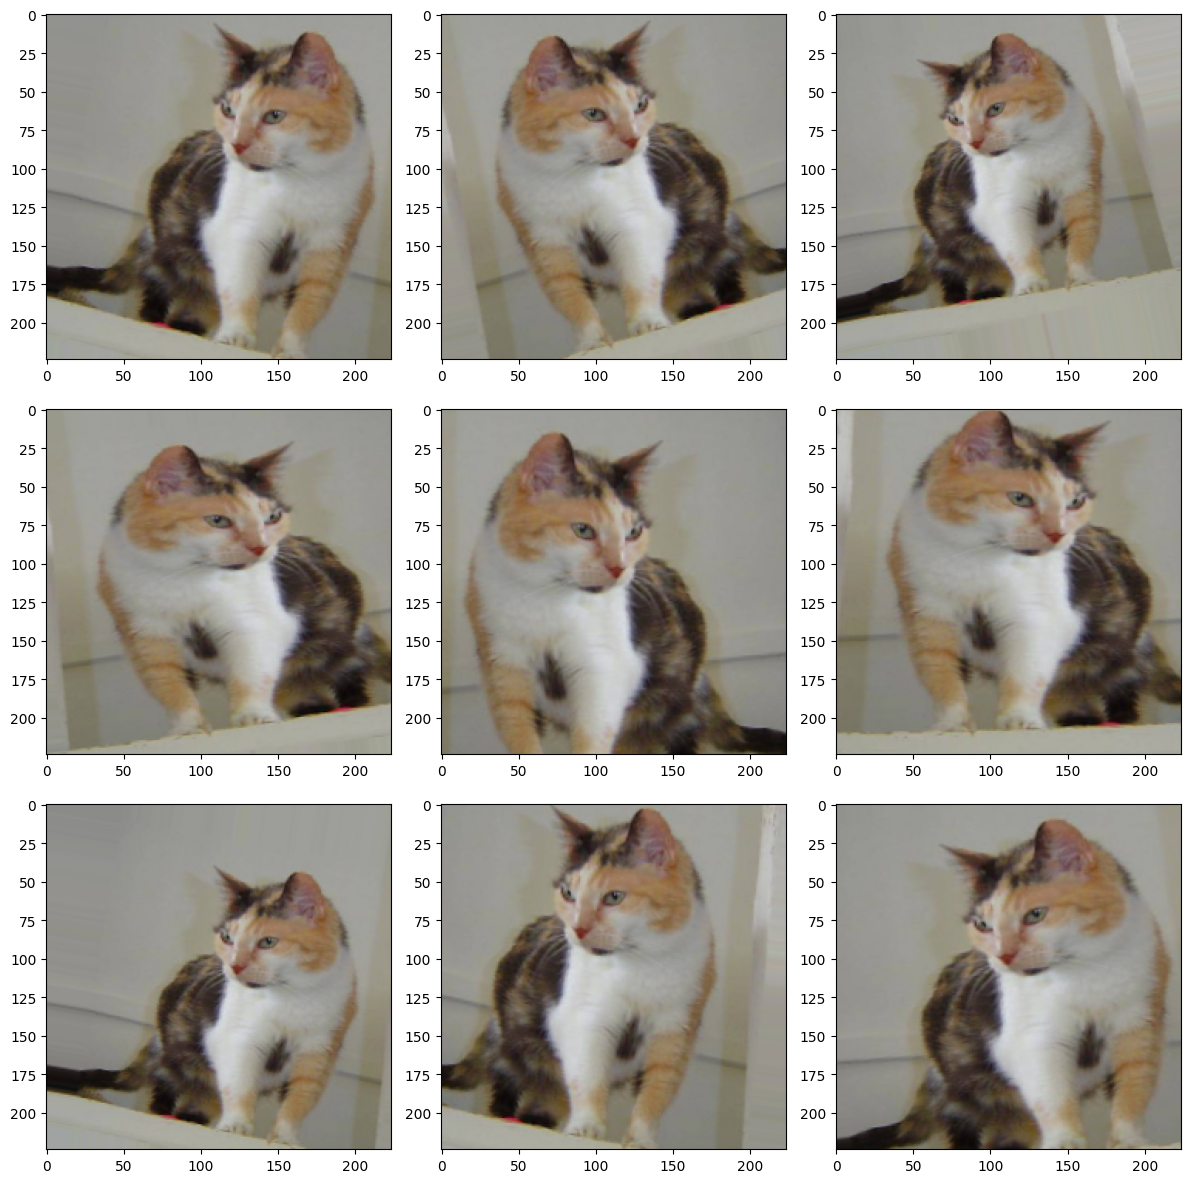

In [61]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import os

# Sample DataFrame with a default "Other" class for binary classification
example_df = train_df.sample(n=1).reset_index(drop=True)
example_df['category'] = 'Other'

# Create an ImageDataGenerator with appropriate augmentation settings
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create a generator using flow_from_dataframe with class_mode='categorical'
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "train/",
    x_col='filename',
    y_col='category',
    class_mode='categorical',  # Use categorical classification
    target_size=(image_size, image_size),
    batch_size=batch_size
)

# Create a subplot grid to display augmented images
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [62]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

C:\Users\HP\AppData\Local\Temp\ipykernel_12828\3390919752.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
1406/1406 [==============================] - 4183s 3s/step - loss: 0.2224 - accuracy: 0.9072 - val_loss: 0.1317 - val_accuracy: 0.9491
Epoch 2/5
1406/1406 [==============================] - 3373s 2s/step - loss: 0.1369 - accuracy: 0.9441 - val_loss: 0.0983 - val_accuracy: 0.9623
Epoch 3/5
1406/1406 [==============================] - 3403s 2s/step - loss: 0.1187 - accuracy: 0.9536 - val_loss: 0.0913 - val_accuracy: 0.9615
Epoch 4/5
1406/1406 [==============================] - 3767s 3s/step - loss: 0.0976 - accuracy: 0.9615 - val_loss: 0.0837 - val_accuracy: 0.9647
Epoch 5/5
1406/1406 [==============================] - 5294s 4s/step - loss: 0.0900 - accuracy: 0.9643 - val_loss: 0.1089 - val_accuracy: 0.9675


In [76]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

C:\Users\HP\AppData\Local\Temp\ipykernel_12828\2489114373.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)


Test: accuracy = 0.967548  ;  loss = 0.108886 


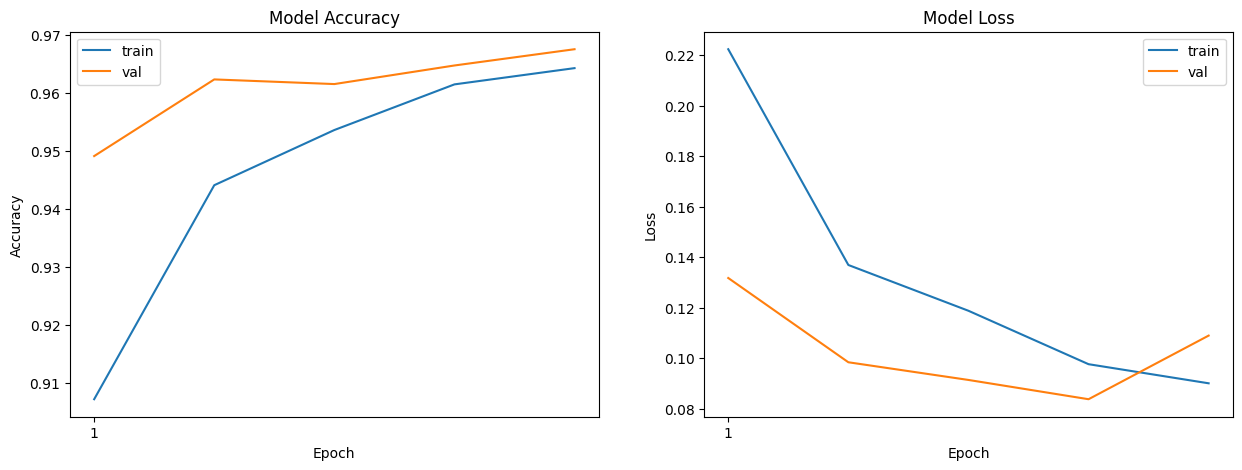

In [93]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    
    # Set custom x-ticks at intervals of 10
    x_ticks = np.arange(1, len(model_history.history[acc]) + 1, 10)
    axs[0].set_xticks(x_ticks)
    
    axs[0].legend(['train', 'val'], loc='best')
    
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    
    # Set custom x-ticks at intervals of 10
    x_ticks = np.arange(1, len(model_history.history['loss']) + 1, 10)
    axs[1].set_xticks(x_ticks)
    
    axs[1].legend(['train', 'val'], loc='best')
    
    plt.show()

# Assuming you have a model history object with accuracy and loss recorded
plot_model_history(history, acc='accuracy', val_acc='val_accuracy')

In [94]:
Y_val = validate_df['category']
y_pred = model.predict(validation_generator)
threshold = 0.5
y_final = np.where(y_pred > threshold, 1, 0)
y_final.size

157/157 [==============================] - 262s 2s/step


2500

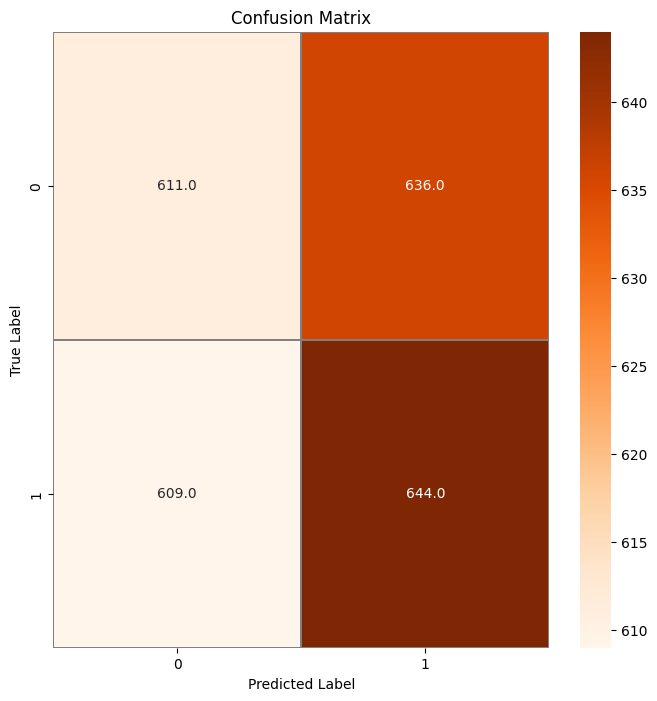

In [131]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert Y_val to integer data type
Y_val = Y_val.astype(int)

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_final) 

# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Oranges" , linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [132]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_val, y_final, target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1247
           1       0.50      0.51      0.51      1253

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500



In [97]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [112]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)


Found 12500 validated image filenames.


In [114]:
predict = model.predict(test_generator)
threshold = 0.5
test_df['category'] = np.where( predict > threshold, 1, 0)

782/782 [==============================] - 1670s 2s/step


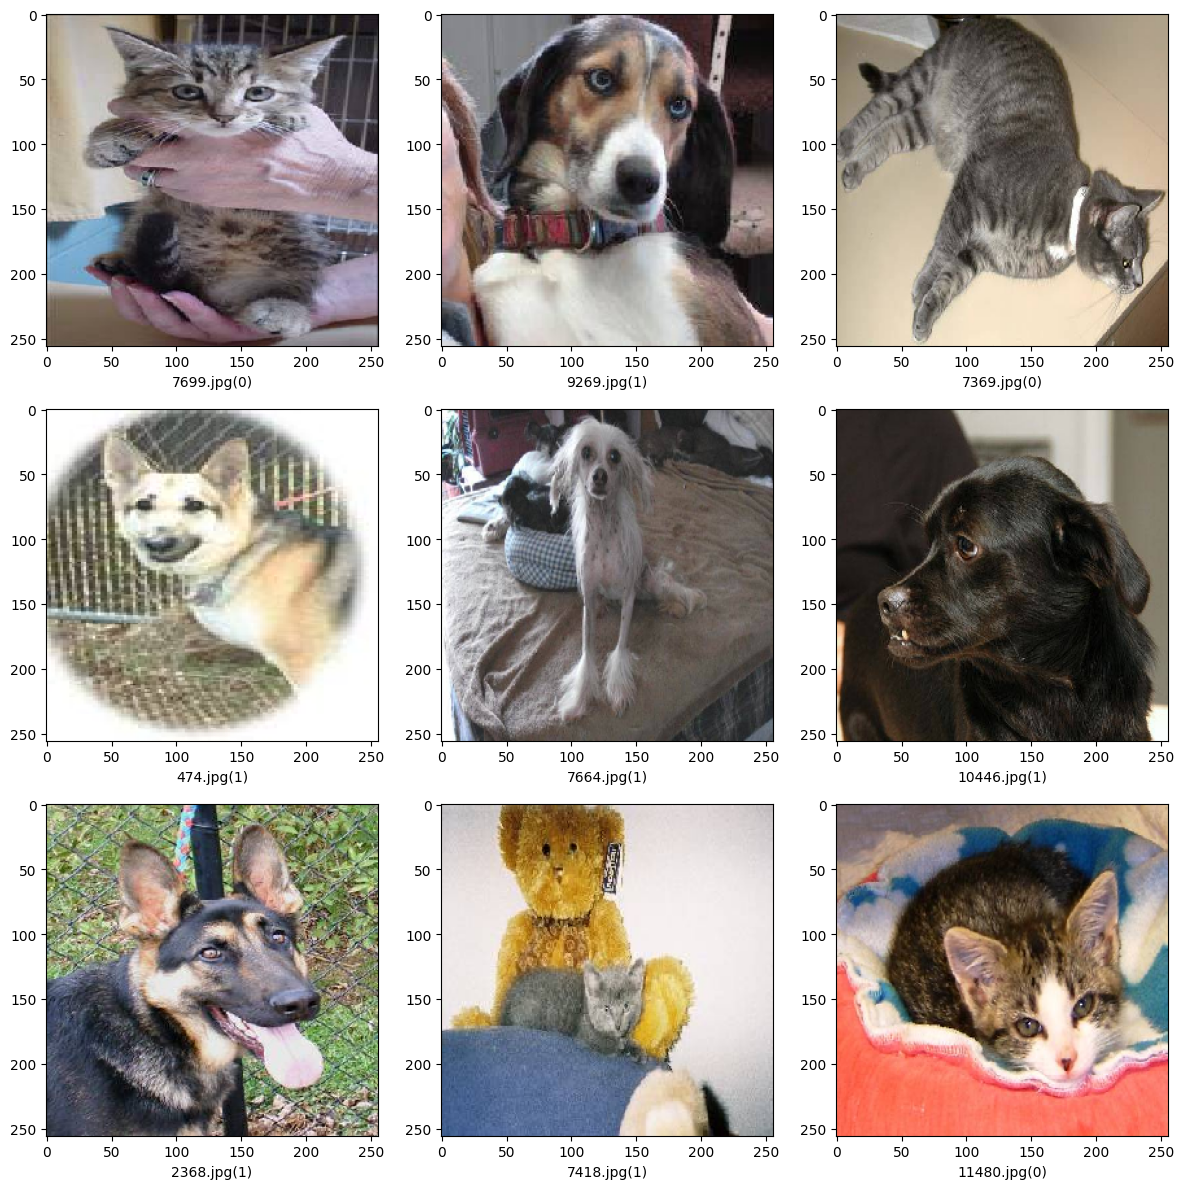

In [119]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test1/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()